In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [27]:
# โหลด dataset
df = pd.read_csv("chairEnggg.csv")

In [28]:
df.describe()

,L1,L3,L4,L2,SL,SR,WL,WR
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.602800,163.801886,281.462343,279.959571,144.478857,136.836057,286.750829,289.150314
std,169.709496,80.157824,146.966034,164.894953,233.752298,223.020986,259.704440,266.201577
min,3.340000,23.300000,11.980000,0.430000,0.000000,0.000000,0.000000,0.000000
25%,209.207500,109.432500,198.422500,215.582500,0.000000,0.000000,0.000000,0.000000
50%,255.845000,175.975000,286.110000,256.020000,0.000000,0.000000,390.750000,380.335000
75%,317.475000,220.212500,406.180000,319.272500,410.857500,360.170000,509.917500,519.502500
max,738.400000,353.730000,510.900000,722.250000,728.000000,758.670000,766.000000,805.000000


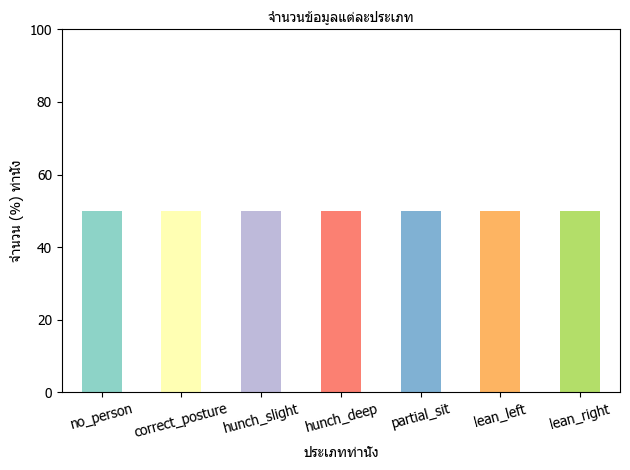

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm

# โหลดฟอนต์ภาษาไทย
font_path = "Sarabun-Regular.ttf"
sarabun_font = fm.FontProperties(family='Tahoma')  


# โหลดข้อมูล
df = pd.read_csv("chairEnggg.csv")
label_counts = df['Label'].value_counts()

# วาดกราฟ
ax = label_counts.plot(kind='bar', color=plt.cm.Set3.colors)

# ตั้งค่าแกนและชื่อ
plt.title("จำนวนข้อมูลแต่ละประเภท", fontproperties=sarabun_font)
plt.xlabel("ประเภทท่านั่ง", fontproperties=sarabun_font)
plt.ylabel("จำนวน (%) ท่านั่ง", fontproperties=sarabun_font)

# จำกัดสเกล Y ให้อยู่ที่ 0 ถึง 100
ax.set_ylim(0, 100)

# แสดง % ที่แกน Y แต่ข้อมูลไม่เปลี่ยน


# ฟอนต์ภาษาไทย
plt.xticks(rotation=15, fontproperties=sarabun_font)
plt.yticks(fontproperties=sarabun_font)

plt.tight_layout()
plt.show()


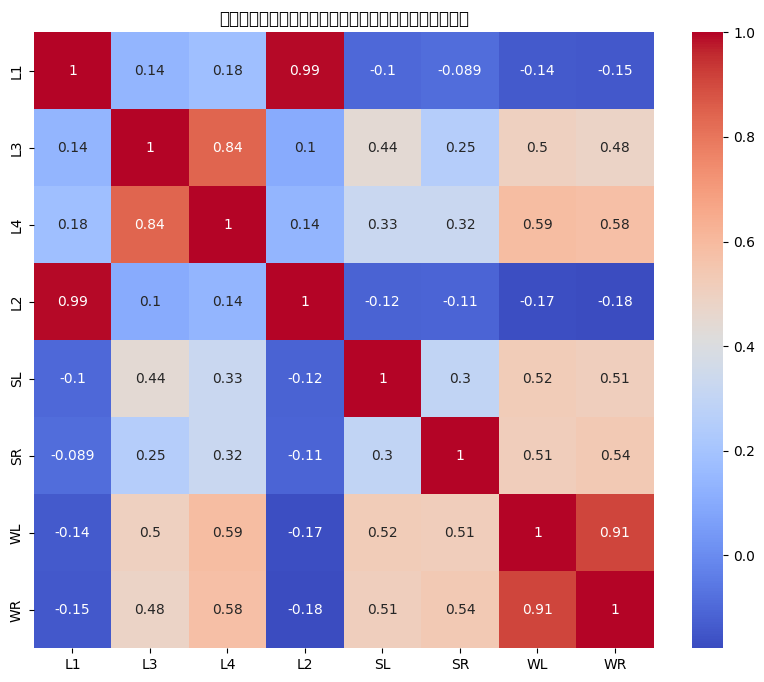

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("ความสัมพันธ์ระหว่างตัวแปร")
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import joblib

# โหลด dataset
df = pd.read_csv("chairEnggg.csv")

# สร้าง x y
X = df.drop(columns=['Label'])
y = df['Label']



In [32]:
from sklearn.preprocessing import StandardScaler

# ใช้ StandardScaler เพื่อ Normalize ข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แปลงกลับเป็น DataFrame เพื่อดูง่าย
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Label'] = y

# แสดงตัวอย่าง 5 แถวแรก
df_scaled.head()

,L1,L3,L4,L2,SL,SR,WL,WR,Label
0,-1.593189,-1.665748,-1.829039,-1.509600,-0.61897,-0.614435,-1.105724,-1.087763,no_person
1,-1.590357,-1.661126,-1.833128,-1.468910,-0.61897,-0.614435,-1.105724,-1.087763,no_person
2,-1.589354,-1.662625,-1.831628,-1.540755,-0.61897,-0.614435,-1.105724,-1.087763,no_person
3,-1.587642,-1.665873,-1.830129,-1.618552,-0.61897,-0.614435,-1.105724,-1.087763,no_person
4,-1.586580,-1.673244,-1.828903,-1.510329,-0.61897,-0.614435,-1.105724,-1.087763,no_person


In [33]:
# แยก X และ y จาก df_scaled
X = df_scaled.drop('Label', axis=1)  # ฟีเจอร์ที่ Normalize แล้ว
y = df_scaled['Label']   

In [34]:

# แปลง label เป็นตัวเลข 
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# (Optional) print mapping
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_map)

# แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)



Label mapping: {'correct_posture': 0, 'hunch_deep': 1, 'hunch_slight': 2, 'lean_left': 3, 'lean_right': 4, 'no_person': 5, 'partial_sit': 6}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

                 precision    recall  f1-score   support

correct_posture       1.00      1.00      1.00        13
     hunch_deep       0.87      1.00      0.93        13
   hunch_slight       1.00      0.75      0.86         8
      lean_left       1.00      1.00      1.00         8
     lean_right       1.00      1.00      1.00         9
      no_person       1.00      1.00      1.00        11
    partial_sit       1.00      1.00      1.00         8

       accuracy                           0.97        70
      macro avg       0.98      0.96      0.97        70
   weighted avg       0.98      0.97      0.97        70



<Figure size 800x600 with 0 Axes>

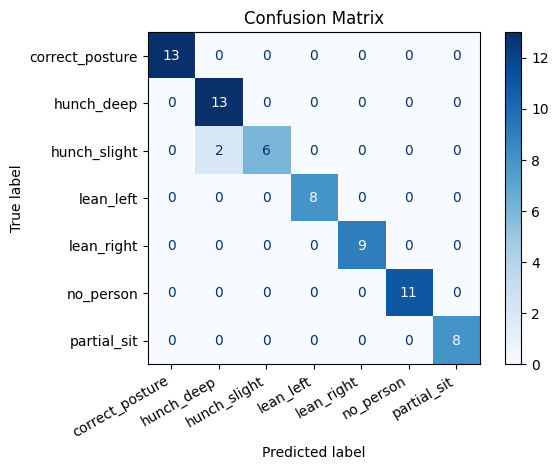

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ทำนายผล
y_pred = model.predict(X_test)

# รายงานผลการจำแนก
print(classification_report(y_test, y_pred, target_names=le.classes_))

# สร้าง confusion matrix
cm = confusion_matrix(y_test, y_pred)

# แสดง confusion matrix แบบกราฟ
plt.figure(figsize=(8, 6))  # 🔁 สร้างก่อน plot เพื่อให้ควบคุมขนาด
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.xticks(rotation=30, ha='right')  # หมุน x-axis ให้สวย และชิดขวา
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()  # จัด spacing ให้อัตโนมัติ ไม่ชนขอบ
plt.show()


In [37]:

# บันทึกโมเดล
joblib.dump(model, "xgboost_posture_model.pkl")

# บันทึก label encoder ด้วย
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']